In [1]:
import pandas as pd

In [8]:
df=pd.read_csv('sp500_historical_data_sector_merged.csv')

In [10]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS Sector
0,0,2020-01-02,148.561874,150.510040,148.110367,150.501678,120.669174,4307633,MMM,Industrials
1,1,2020-01-03,148.010040,149.381271,146.847824,149.205688,119.630074,2950412,MMM,Industrials
2,2,2020-01-06,148.118729,149.423080,147.449829,149.347824,119.744034,2389608,MMM,Industrials
3,3,2020-01-07,149.063538,149.255859,147.842804,148.745819,119.261368,2598908,MMM,Industrials
4,4,2020-01-08,148.829437,151.755859,148.536789,151.028427,121.091507,3298927,MMM,Industrials
...,...,...,...,...,...,...,...,...,...,...
498599,498599,2023-12-22,195.320007,195.910004,192.740005,194.979996,193.985657,1548400,ZTS,Health Care
498600,498600,2023-12-26,194.880005,196.339996,194.089996,195.500000,194.503006,814600,ZTS,Health Care
498601,498601,2023-12-27,195.410004,197.009995,194.740005,196.899994,195.895859,766400,ZTS,Health Care
498602,498602,2023-12-28,197.619995,198.600006,196.529999,197.160004,196.154541,880100,ZTS,Health Care


# Fixing Null value issue

In [11]:
sector_mapping = {
    'AAL': 'Industrials',                   
    'BBWI': 'Consumer Discretionary',       
    'BIO': 'Health Care',                   
    'BWA': 'Consumer Discretionary',        
    'CTLT': 'Health Care',                  
    'CE': 'Materials',                      
    'CMA': 'Financials',                    
    'ETSY': 'Consumer Discretionary',       
    'FMC': 'Materials',                     
    'ILMN': 'Health Care',                  
    'MRO': 'Energy',                        
    'QRVO': 'Information Technology',       
    'RHI': 'Industrials',                   
    'TFX': 'Health Care',                   
    'WRK': 'Materials'                      
}

df['GICS Sector'] = df.apply(
    lambda row: sector_mapping[row['Ticker']] if pd.isnull(row['GICS Sector']) and row['Ticker'] in sector_mapping else row['GICS Sector'],
    axis=1
)

missing_after_fill = df['GICS Sector'].isnull().sum()
missing_after_fill


0

In [12]:
df.isnull().sum()

Unnamed: 0     0
Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Ticker         0
GICS Sector    0
dtype: int64

In [28]:
df_model.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS Sector,Prev_Close,Prev_Adj_Close,Prev_Volume,MA_5,MA_10,Ticker_encoded,Sector_encoded,Target_Class
9064,9064,2020-01-16,89.120003,89.489998,88.860001,89.459999,86.912064,1595900,A,Health Care,88.620003,86.095985,1630400.0,85.285744,84.062598,0,5,1
9065,9065,2020-01-17,89.970001,90.279999,89.209999,90.120003,87.553276,3718300,A,Health Care,89.459999,86.912064,1595900.0,85.711270,84.403602,0,5,0
9066,9066,2020-01-21,89.800003,90.150002,89.459999,89.610001,87.057785,2697400,A,Health Care,90.120003,87.553276,3718300.0,86.202858,84.942796,0,5,1
9067,9067,2020-01-22,89.940002,90.639999,89.839996,90.129997,87.562981,1665800,A,Health Care,89.610001,87.057785,2697400.0,86.620610,85.408154,0,5,0
9068,9068,2020-01-23,89.620003,89.980003,88.660004,89.070000,86.533165,1228300,A,Health Care,90.129997,87.562981,1665800.0,87.036418,85.898771,0,5,0


In [39]:
df.info

<bound method DataFrame.info of         Unnamed: 0       Date        Open        High         Low       Close  \
9054          9054 2020-01-02   85.900002   86.349998   85.199997   85.949997   
9055          9055 2020-01-03   84.669998   85.330002   84.500000   84.570000   
9056          9056 2020-01-06   84.000000   84.820000   83.599998   84.820000   
9057          9057 2020-01-07   83.959999   85.260002   83.940002   85.080002   
9058          9058 2020-01-08   85.959999   86.470001   85.199997   85.919998   
...            ...        ...         ...         ...         ...         ...   
498599      498599 2023-12-22  195.320007  195.910004  192.740005  194.979996   
498600      498600 2023-12-26  194.880005  196.339996  194.089996  195.500000   
498601      498601 2023-12-27  195.410004  197.009995  194.740005  196.899994   
498602      498602 2023-12-28  197.619995  198.600006  196.529999  197.160004   
498603      498603 2023-12-29  196.679993  198.009995  196.250000  197.369995

# Modeling Section

In [14]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by=['Ticker', 'Date'])

df['Prev_Close'] = df.groupby('Ticker')['Close'].shift(1)
df['Prev_Adj_Close'] = df.groupby('Ticker')['Adj Close'].shift(1)
df['Prev_Volume'] = df.groupby('Ticker')['Volume'].shift(1)

df['MA_5'] = df.groupby('Ticker')['Adj Close'].transform(lambda x: x.shift(1).rolling(window=5).mean())
df['MA_10'] = df.groupby('Ticker')['Adj Close'].transform(lambda x: x.shift(1).rolling(window=10).mean())

label_encoder_ticker = LabelEncoder()
label_encoder_sector = LabelEncoder()

df['Ticker_encoded'] = label_encoder_ticker.fit_transform(df['Ticker'])
df['Sector_encoded'] = label_encoder_sector.fit_transform(df['GICS Sector'])

df_model = df.dropna()


features = ['Prev_Close', 'Prev_Adj_Close', 'Prev_Volume', 'MA_5', 'MA_10', 'Ticker_encoded', 'Sector_encoded']
target = 'Adj Close'

X = df_model[features]
y = df_model[target]

split_index = int(len(df_model) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")



Linear Regression Model Performance:
RMSE: 3.75
MAE: 2.06
R² Score: 0.9991


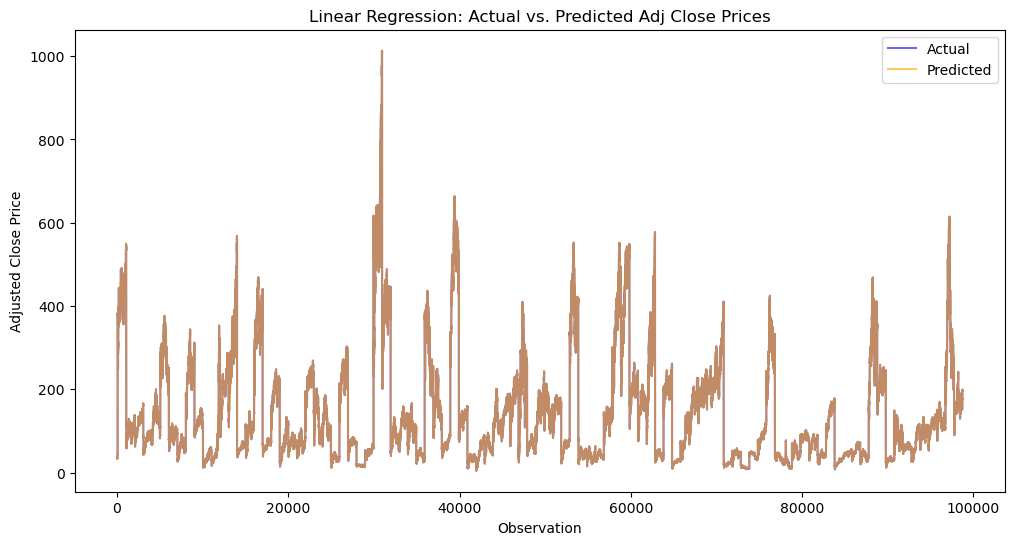

In [27]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_lr
}).reset_index(drop=True)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual'], label='Actual', color='blue', alpha=0.6)
plt.plot(results_df['Predicted'], label='Predicted', color='orange', alpha=0.6)
plt.title('Linear Regression: Actual vs. Predicted Adj Close Prices')
plt.xlabel('Observation')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


In [17]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Model Performance:")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MAE: {mae_gb:.2f}")
print(f"R² Score: {r2_gb:.4f}")


Gradient Boosting Model Performance:
RMSE: 3.84
MAE: 2.15
R² Score: 0.9991


          Feature    Importance
1  Prev_Adj_Close  6.920443e-01
0      Prev_Close  3.028930e-01
3            MA_5  4.409024e-03
4           MA_10  6.267266e-04
2     Prev_Volume  2.602238e-05
5  Ticker_encoded  9.526787e-07
6  Sector_encoded  1.180342e-09


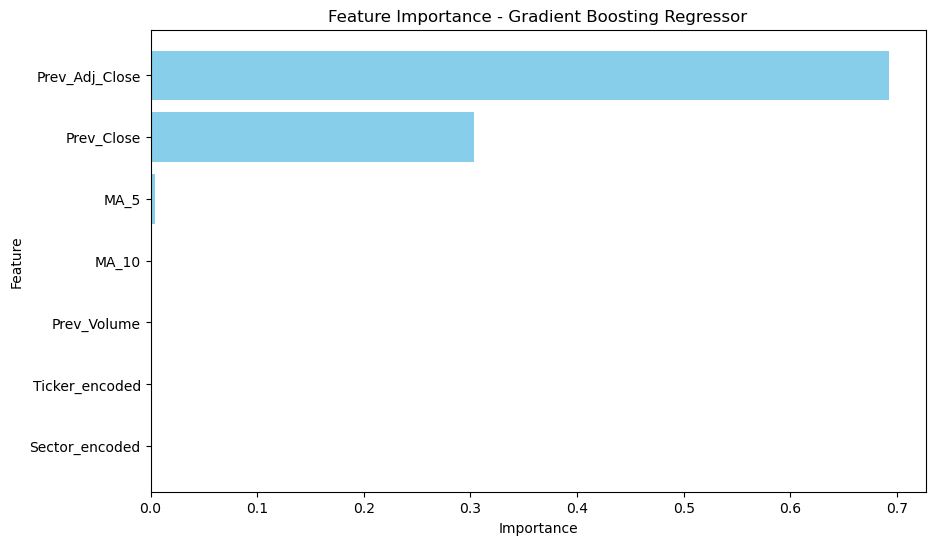

In [18]:
importances = gb_model.feature_importances_
feature_names = features

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()


# LSTM

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

def create_sequences(X_data, y_data, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X_data) - time_steps):
        Xs.append(X_data[i:i + time_steps])
        ys.append(y_data[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Step 3: Train/test split
split = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]



In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/5


2025-04-09 16:25:02.912796: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5554/5554 [==============================] - 35s 6ms/step - loss: 3.2212e-05 - val_loss: 9.6845e-05
Epoch 2/5
5554/5554 [==============================] - 34s 6ms/step - loss: 1.6979e-05 - val_loss: 3.1958e-05
Epoch 3/5
5554/5554 [==============================] - 33s 6ms/step - loss: 1.3130e-05 - val_loss: 1.5754e-06
Epoch 4/5
5554/5554 [==============================] - 34s 6ms/step - loss: 1.2258e-05 - val_loss: 2.4244e-06
Epoch 5/5
5554/5554 [==============================] - 33s 6ms/step - loss: 1.1573e-05 - val_loss: 1.5099e-06


3086/3086 [==============================] - 4s 1ms/step
LSTM Model Performance:
RMSE: 8.65
MAE: 4.43
R² Score: 0.9952


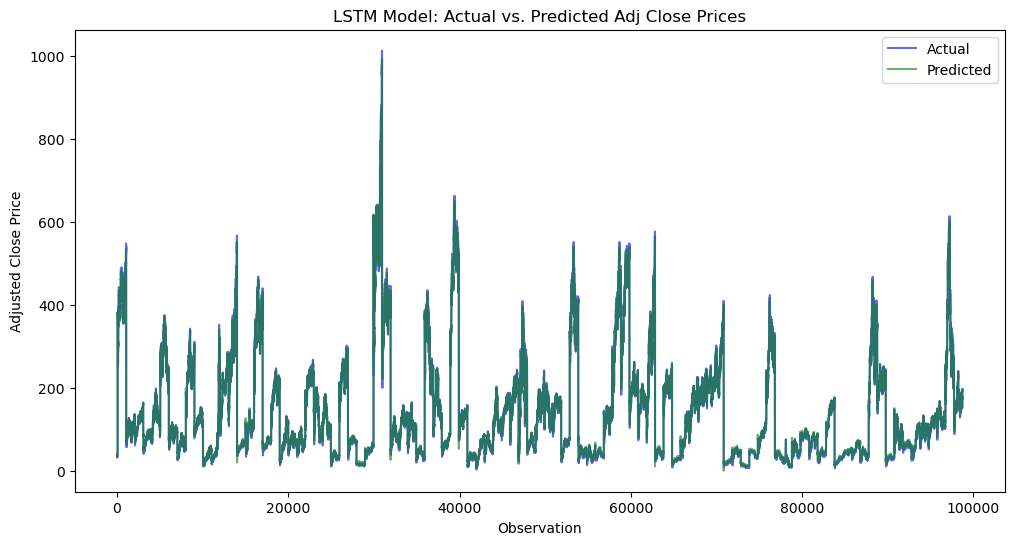

In [21]:
y_pred_seq = model.predict(X_test_seq)

y_test_inv = scaler.inverse_transform(y_test_seq)
y_pred_inv = scaler.inverse_transform(y_pred_seq)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)
r2_lstm = r2_score(y_test_inv, y_pred_inv)

print("LSTM Model Performance:")
print(f"RMSE: {rmse_lstm:.2f}")
print(f"MAE: {mae_lstm:.2f}")
print(f"R² Score: {r2_lstm:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual', color='blue', alpha=0.6)
plt.plot(y_pred_inv, label='Predicted', color='green', alpha=0.6)
plt.title('LSTM Model: Actual vs. Predicted Adj Close Prices')
plt.xlabel('Observation')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


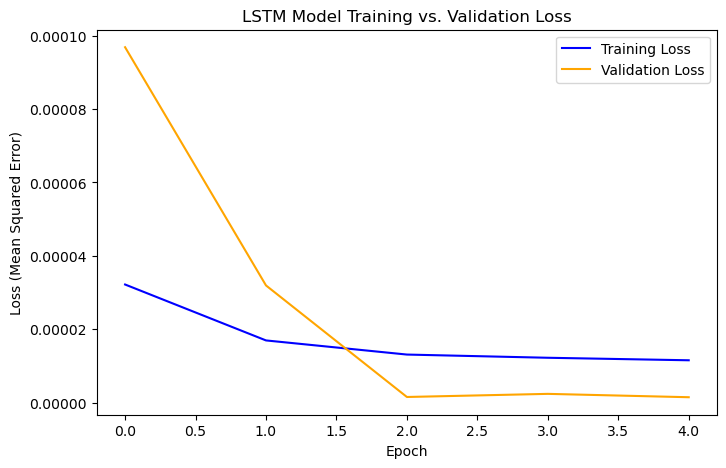

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Model Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()


# Confusion mat

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

df_model['Target_Class'] = (df_model['Adj Close'].shift(-1) > df_model['Adj Close']).astype(int)

df_class = df_model.dropna()

X_class = df_class[features]
y_class = df_class['Target_Class']

split_index_class = int(len(df_class) * 0.8)
X_train_class, X_test_class = X_class.iloc[:split_index_class], X_class.iloc[split_index_class:]
y_train_class, y_test_class = y_class.iloc[:split_index_class], y_class.iloc[split_index_class:]


/var/folders/82/mmpmdh_15n73f096pfrl3yvh0000gn/T/ipykernel_73219/4052269709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Target_Class'] = (df_model['Adj Close'].shift(-1) > df_model['Adj Close']).astype(int)


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

gbc.fit(X_train_class, y_train_class)

y_pred_class = gbc.predict(X_test_class)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy:.2f}')


Classification Accuracy: 0.51


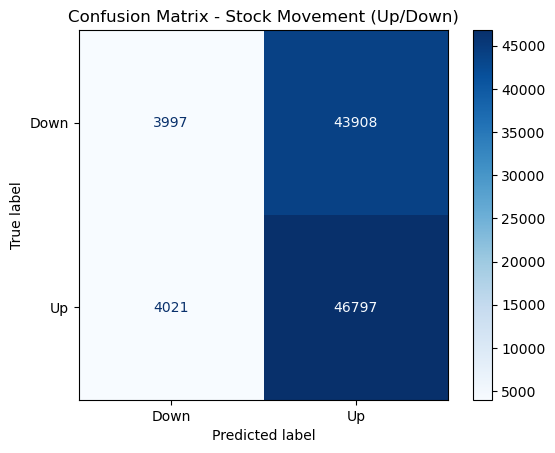

In [25]:
cm = confusion_matrix(y_test_class, y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Stock Movement (Up/Down)')
plt.show()


In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_test_class, y_pred_class, target_names=['Down', 'Up'])

print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

        Down       0.50      0.08      0.14     47905
          Up       0.52      0.92      0.66     50818

    accuracy                           0.51     98723
   macro avg       0.51      0.50      0.40     98723
weighted avg       0.51      0.51      0.41     98723



# Forecasting

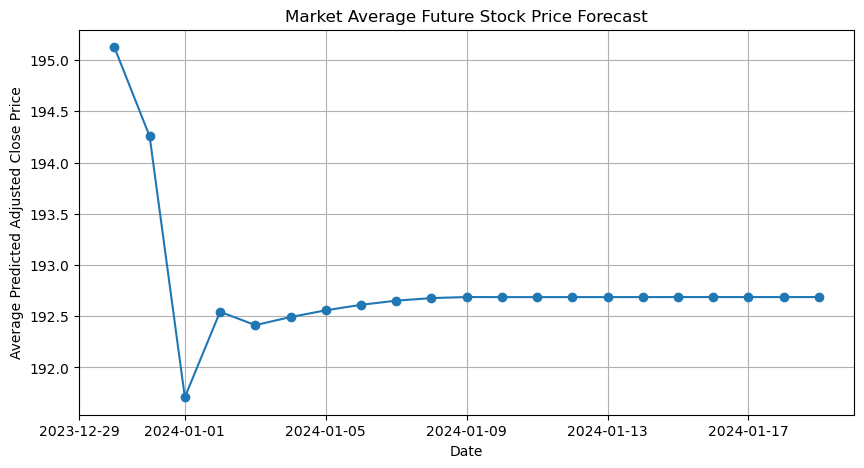

In [37]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

future_days = 21

all_forecasts = []

tickers = df['Ticker'].unique()

for ticker in tickers:
    ticker_df = df[df['Ticker'] == ticker].copy()
    
    features_ticker = ['Prev_Close', 'Prev_Adj_Close', 'Prev_Volume', 'MA_5', 'MA_10', 'Ticker_encoded', 'Sector_encoded']
    target_ticker = 'Adj Close'
    
    if ticker_df.shape[0] < time_steps:
        continue
    
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_ticker = ticker_df[features_ticker]
    y_ticker = ticker_df[target_ticker].values.reshape(-1, 1)
    
    X_scaled_ticker = scaler_X.fit_transform(X_ticker)
    y_scaled_ticker = scaler_y.fit_transform(y_ticker)
    
    last_sequence = X_scaled_ticker[-time_steps:]
    current_sequence = last_sequence.reshape(1, time_steps, X_scaled_ticker.shape[1])
    
    future_predictions_scaled = []
    
    for _ in range(future_days):
        next_pred_scaled = model.predict(current_sequence, verbose=0)[0]
        future_predictions_scaled.append(next_pred_scaled)
        
        next_input = np.append(current_sequence[0][1:], [np.append(current_sequence[0][-1][:-1], next_pred_scaled)], axis=0)
        current_sequence = next_input.reshape(1, time_steps, X_scaled_ticker.shape[1])
    
    future_predictions_actual = scaler_y.inverse_transform(np.array(future_predictions_scaled))
    
    last_date = ticker_df['Date'].max()
    future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]
    
    forecast_df = pd.DataFrame({
        'Ticker': ticker,
        'Date': future_dates,
        'Predicted Adj Close': future_predictions_actual.flatten()
    })
    
    all_forecasts.append(forecast_df)

final_forecast_df = pd.concat(all_forecasts).reset_index(drop=True)

market_forecast = final_forecast_df.groupby('Date')['Predicted Adj Close'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(market_forecast['Date'], market_forecast['Predicted Adj Close'], marker='o', linestyle='-')
plt.title('Market Average Future Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Average Predicted Adjusted Close Price')
plt.grid(True)
plt.show()


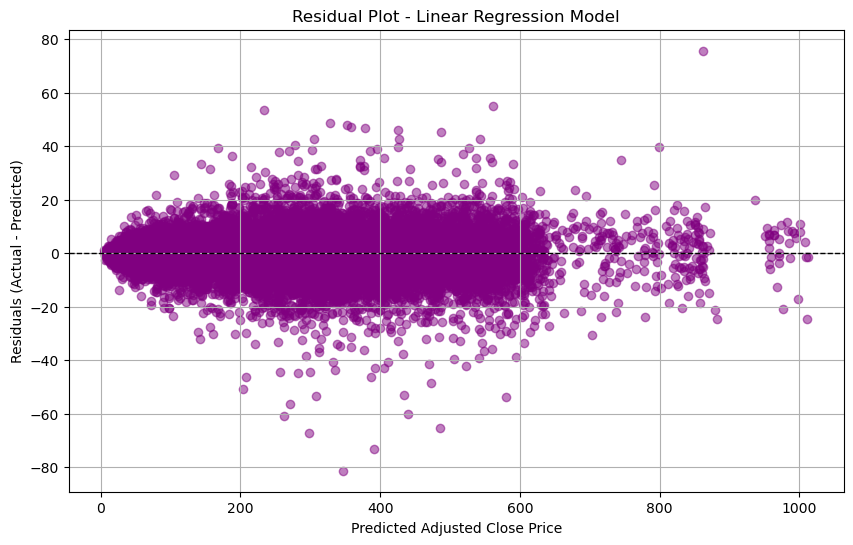

In [36]:
import matplotlib.pyplot as plt

residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot - Linear Regression Model')
plt.xlabel('Predicted Adjusted Close Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

sector_r2_scores = []

for sector in df['GICS Sector'].unique():
    sector_df = df[df['GICS Sector'] == sector].copy()
    
    sector_df = sector_df.dropna(subset=['Adj Close', 'Date_ordinal'])
    
    X = sector_df[['Date_ordinal']]
    y = sector_df['Adj Close']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    sector_r2_scores.append((sector, r2))

sorted_scores = sorted(sector_r2_scores, key=lambda x: x[1], reverse=True)

print("R² Scores by Sector (Higher = More Influence Over Time):")
for sector, score in sorted_scores:
    print(f"{sector}: {score:.4f}")


R² Scores by Sector (Higher = More Influence Over Time):
Energy: 0.2422
Industrials: 0.0291
Information Technology: 0.0289
Materials: 0.0237
Utilities: 0.0142
Consumer Staples: 0.0094
Financials: 0.0081
Health Care: 0.0077
Consumer Discretionary: 0.0042
Communication Services: 0.0016
Real Estate: 0.0012


In [42]:
import pandas as pd

sector_r2 = {
    'Energy': 0.2422,
    'Industrials': 0.0291,
    'Information Technology': 0.0289,
    'Materials': 0.0237,
    'Utilities': 0.0142,
    'Consumer Staples': 0.0094,
    'Financials': 0.0081,
    'Health Care': 0.0077,
    'Consumer Discretionary': 0.0042,
    'Communication Services': 0.0016,
    'Real Estate': 0.0012
}

r2_df = pd.DataFrame(
    list(sector_r2.items()),
    columns=['Sector', 'R² Score']
).sort_values(by='R² Score', ascending=False).reset_index(drop=True)

display(r2_df)  


,Sector,R² Score
0,Energy,0.2422
1,Industrials,0.0291
2,Information Technology,0.0289
3,Materials,0.0237
4,Utilities,0.0142
5,Consumer Staples,0.0094
6,Financials,0.0081
7,Health Care,0.0077
8,Consumer Discretionary,0.0042
9,Communication Services,0.0016
